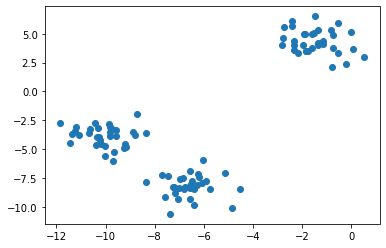

In [3]:
# 군집화 : 데이터를 n개의 클러스터로 분할
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 군집화 데이터 생성
X, y = make_blobs(random_state=1, centers = 3) # 3개의 군집으로 데이터 생성

# 1차 시각화
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# target label 확인
print('Targets:', y)

Targets: [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [15]:
# kmeans 모델 생성
kmeans = KMeans(n_clusters=3) # 3개의 클러스터로 군집화
kmeans.fit(X) # 학습
# 예측된 클러스터 레이블
print("예측된 레이블:", kmeans.labels_)

예측된 레이블: [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [17]:
# 데이터 프레임 생성
import pandas as pd
df =  pd.DataFrame({
    "Feature 1": X[:, 0],
    "Feature 2": X[:, 1],
    'cluster': kmeans.labels_
})

df

,Feature 1,Feature 2,cluster
0,-0.794152,2.104951,0
1,-9.151552,-4.812864,2
2,-11.441826,-4.457814,2
3,-9.767618,-3.191337,2
4,-4.536556,-8.401863,1
...,...,...,...
95,-6.026058,-5.966248,1
96,-7.047473,-9.275247,1
97,-1.373973,5.291631,0
98,-6.253931,-7.108786,1


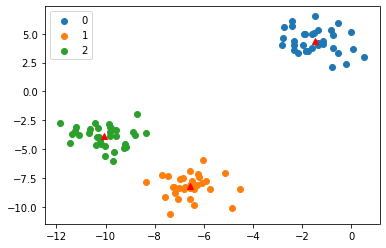

In [26]:
# 시각화
# 그룹별 시각화
for cluster in sorted(df['cluster'].unique()):
#     print(cluster)
    data = df[df['cluster'] == cluster] # 필터링
    plt.scatter(data['Feature 1'],
                data['Feature 2'], label=cluster)

# 클러스터의 중심 시각화
# print(kmeans.cluster_centers_)
for center in kmeans.cluster_centers_:
    plt.plot(center[0], center[1],
            marker='^', c='red')
plt.legend()
plt.show()
    

Shape of data: (150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
예측된 클러스터: [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
label: 0
label: 1
label: 2


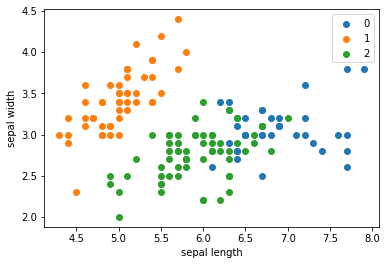

In [40]:
# iris 데이터셋을 이용한 군집화 연습
from sklearn.datasets import load_iris

iris = load_iris()
print('Shape of data:', iris.data.shape)
print(iris.feature_names) # 0, 1 feature를 이용하여 군집화
print(iris.target_names) # n_cluster = 3

# 알고리즘 생성
model = KMeans(n_clusters=3) # 중심 3개
model.fit(iris.data) # 학습
print('예측된 클러스터:', model.cluster_centers_)

import numpy as np
# 데이터 프레임 생성
cluster_df = pd.DataFrame(
    data = np.c_[iris.data, model.labels_],
    columns = iris.feature_names + ['label']
)

cluster_df.label = cluster_df.label.astype('uint8') # 정수형으로 변환
cluster_df

# sepal length vs sepal width로 시각화
for label in sorted(cluster_df.label.unique()):
    print('label:', label)
    
    # 필터링
    cluster_data = cluster_df[cluster_df.label == label]
    plt.scatter(cluster_data.iloc[:, 0], # 0번 변수
                cluster_data.iloc[:, 1], # 1번 변수
                label=label)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()    